In [1]:
# Harbinger Package
# version 1.0.50

source("https://raw.githubusercontent.com/cefet-rj-dal/harbinger/master/examples/jupyter_harbinger.R")

#loading Harbinger
load_harbinger() 

Loading required package: harbinger

Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

Warning message:
“replacing previous import ‘dplyr::filter’ by ‘stats::filter’ when loading ‘daltoolbox’”
Warning message:
“replacing previous import ‘TSPred::minmax’ by ‘daltoolbox::minmax’ when loading ‘harbinger’”


In [2]:
#loading the example database
data(har_examples)

In [3]:
#Using the time series 1 
dataset <- har_examples[[9]]
head(dataset)

,serie,event
,<dbl>,<lgl>
1,-1.1597821,FALSE
2,-1.5782775,FALSE
3,-1.5653926,FALSE
4,-0.7182375,FALSE
5,0.6003753,FALSE
6,0.1899022,FALSE


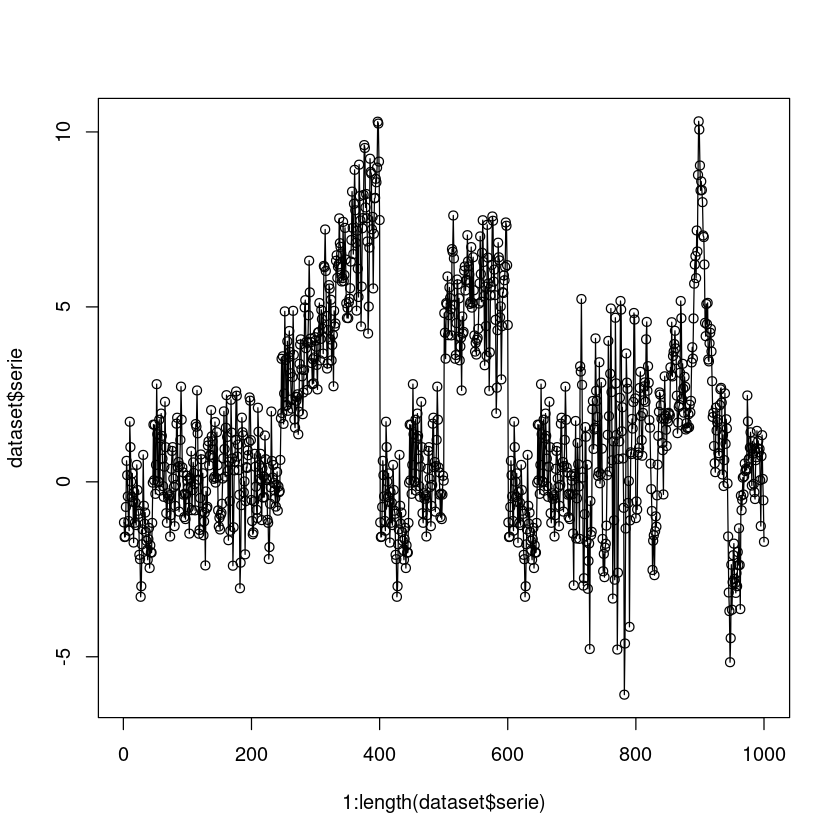

In [4]:
#ploting serie #1

plot(x = 1:length(dataset$serie), y = dataset$serie)
lines(x = 1:length(dataset$serie), y = dataset$serie)

In [5]:
# establishing change finder arima method 
  model <- change_finder_lr()

In [6]:
# fitting the model
  model <- fit(model, dataset$serie)

In [7]:
# making detections using fbiad
  detection <- detect(model, dataset$serie)

In [8]:
# filtering detected events
  print(detection |> dplyr::filter(event==TRUE))

   idx event         type
1  315  TRUE      anomaly
2  337  TRUE      anomaly
3  343  TRUE      anomaly
4  346  TRUE      anomaly
5  356  TRUE      anomaly
6  359  TRUE change_point
7  360  TRUE      anomaly
8  365  TRUE      anomaly
9  368  TRUE      anomaly
10 373  TRUE      anomaly
11 384  TRUE      anomaly
12 391  TRUE      anomaly
13 515  TRUE      anomaly
14 537  TRUE      anomaly
15 557  TRUE      anomaly
16 561  TRUE      anomaly
17 568  TRUE      anomaly
18 576  TRUE      anomaly
19 585  TRUE      anomaly
20 597  TRUE      anomaly
21 728  TRUE      anomaly
22 764  TRUE      anomaly
23 771  TRUE      anomaly
24 782  TRUE      anomaly
25 790  TRUE      anomaly
26 895  TRUE      anomaly
27 897  TRUE      anomaly
28 912  TRUE change_point
29 946  TRUE      anomaly
30 950  TRUE      anomaly
31 963  TRUE      anomaly


In [9]:
# evaluating the detections
  evaluation <- evaluate(model, detection$event, dataset$event)
  print(evaluation$confMatrix)

          event      
detection TRUE  FALSE
TRUE      0     31   
FALSE     6     963  


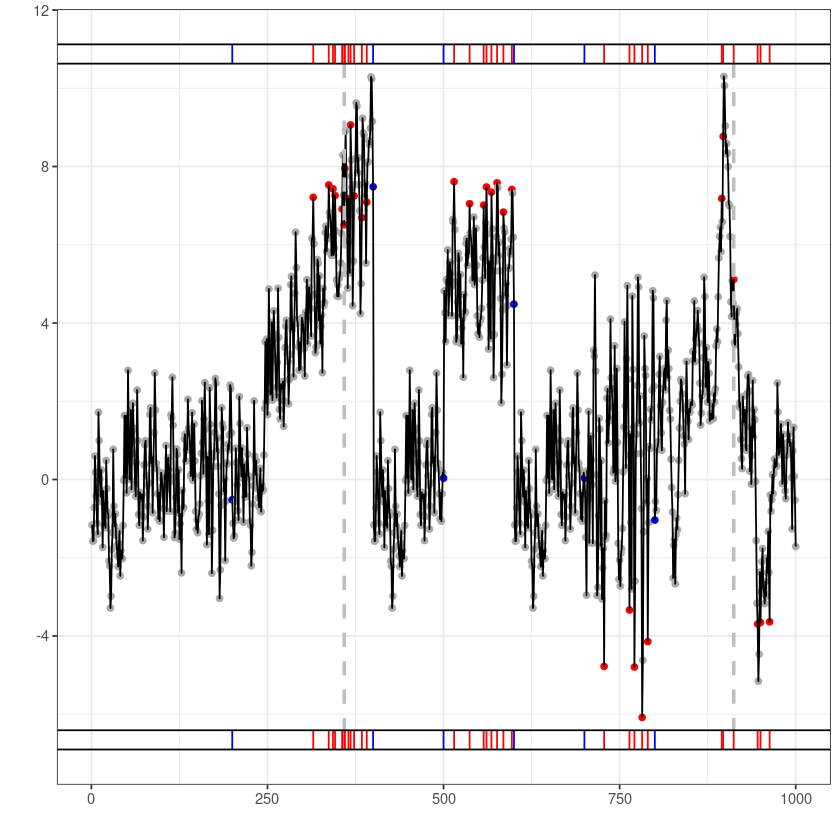

In [10]:
# ploting the results
  grf <- plot.harbinger(model, dataset$serie, detection, dataset$event)
  plot(grf)